# Generalization: The goal of machine learining

## Underfitting and overfitting

### adding white-noise channels or all-zeros channle to MNIST

In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis = 1
)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis = 1
)

In [5]:
train_images_with_noise_channels.shape

(60000, 1568)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation = 'relu'),
        layers.Dense(10, activation = 'softmax')
    ])
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [7]:
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7797 - loss: 0.7117 - val_accuracy: 0.9212 - val_loss: 0.2730
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9292 - loss: 0.2390 - val_accuracy: 0.9318 - val_loss: 0.2255
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9516 - loss: 0.1636 - val_accuracy: 0.9410 - val_loss: 0.1932
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9644 - loss: 0.1173 - val_accuracy: 0.9495 - val_loss: 0.1624
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9760 - loss: 0.0836 - val_accuracy: 0.9614 - val_loss: 0.1333
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9854 - loss: 0.0563 - val_accuracy: 0.9571 - val_loss: 0.1426
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9898 - loss: 0.0397 - val_accuracy: 0.9619 - val_loss: 0.1280
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9934 - loss: 0.0277 - val_accuracy: 0.

In [9]:
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8647 - loss: 0.4996 - val_accuracy: 0.9578 - val_loss: 0.1535
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9619 - loss: 0.1342 - val_accuracy: 0.9641 - val_loss: 0.1148
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9762 - loss: 0.0831 - val_accuracy: 0.9732 - val_loss: 0.0926
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9842 - loss: 0.0576 - val_accuracy: 0.9732 - val_loss: 0.0870
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9880 - loss: 0.0431 - val_accuracy: 0.9757 - val_loss: 0.0782
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9921 - loss: 0.0306 - val_accuracy: 0.9763 - val_loss: 0.0767
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9938 - loss: 0.0250 - val_accuracy: 0.9775 - val_loss: 0.0760
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9965 - loss: 0.0165 - val_accuracy: 0.

In [14]:
model = get_model()
history_original = model.fit(
    train_images,
    train_labels,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8517 - loss: 0.5145 - val_accuracy: 0.9570 - val_loss: 0.1543
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9604 - loss: 0.1350 - val_accuracy: 0.9693 - val_loss: 0.1055
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9764 - loss: 0.0838 - val_accuracy: 0.9722 - val_loss: 0.0911
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9837 - loss: 0.0570 - val_accuracy: 0.9758 - val_loss: 0.0809
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9887 - loss: 0.0421 - val_accuracy: 0.9783 - val_loss: 0.0798
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9916 - loss: 0.0310 - val_accuracy: 0.9779 - val_loss: 0.0754
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9943 - loss: 0.0229 - val_accuracy: 0.9773 - val_loss: 0.0746
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9960 - loss: 0.0171 - val_accuracy: 0.

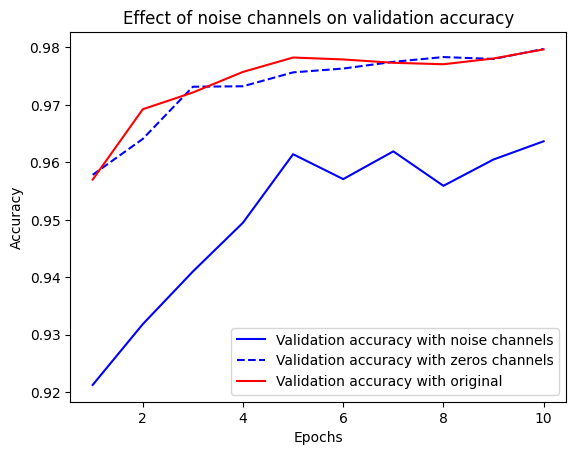

In [15]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r-",
         label="Validation accuracy with original")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## Randomly shuffled labels

In [17]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_shuffle = model.fit(train_images, random_train_labels,
          epochs=10,
          batch_size=128,
train_acc_shuffle = history_shuffle.history['accuracy']
val_acc_shuffle = history_shuffle.history['val_accuracy']
epochs = range(1, 51)
plt.plot(epochs, train_acc_shuffle, "r--",
         label="Training accuracy with shuffled labels")
plt.plot(epochs, val_acc_shuffle, "b--",
         label="Validation accuracy with shuffled labels")
plt.legend()
plt.show()
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0993 - loss: 2.3319 - val_accuracy: 0.1052 - val_loss: 2.3037
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1190 - loss: 2.2973 - val_accuracy: 0.1037 - val_loss: 2.3102
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1300 - loss: 2.2880 - val_accuracy: 0.1028 - val_loss: 2.3164
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1415 - loss: 2.2778 - val_accuracy: 0.0989 - val_loss: 2.3263
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1546 - loss: 2.2587 - val_accuracy: 0.1026 - val_loss: 2.3306
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1705 - loss: 2.2389 - val_accuracy: 0.0988 - val_loss: 2.3480
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1862 - loss: 2.2147 - val_accuracy: 0.1018 - val_loss: 2.3644
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2009 - loss: 2.1887 - val_accuracy: 0.

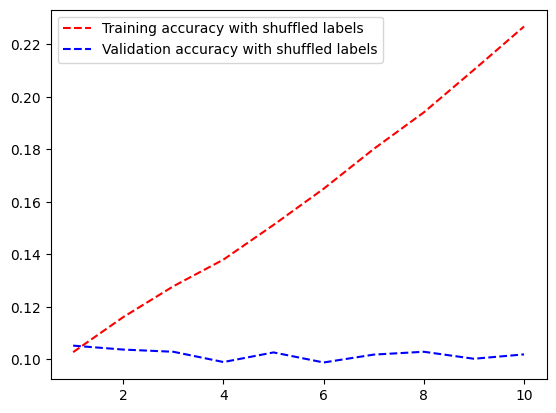

In [19]:
train_acc_shuffle = history_shuffle.history['accuracy']
val_acc_shuffle = history_shuffle.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, train_acc_shuffle, "r--",
         label="Training accuracy with shuffled labels")
plt.plot(epochs, val_acc_shuffle, "b--",
         label="Validation accuracy with shuffled labels")
plt.legend()
plt.show()

## Improving model fit

In [35]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32') / 255

### incorrectly high learning rate(1.)

In [36]:
model = keras.Sequential([
    layers.Dense(512, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = keras.optimizers.RMSprop(1.),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs = 10, batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4679 - loss: 3424.4658 - val_accuracy: 0.2263 - val_loss: 3.0971
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2025 - loss: 10.0541 - val_accuracy: 0.2022 - val_loss: 2.2410
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1919 - loss: 2.4795 - val_accuracy: 0.1824 - val_loss: 2.3062
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1712 - loss: 2.8150 - val_accuracy: 0.2224 - val_loss: 2.2355
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2260 - loss: 2.5832 - val_accuracy: 0.1733 - val_loss: 2.2989
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1938 - loss: 2.4721 - val_accuracy: 0.2233 - val_loss: 2.2037
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2022 - loss: 2.3871 - val_accuracy: 0.2017 - val_loss: 2.1151
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1967 - loss: 2.4421 - val_accuracy

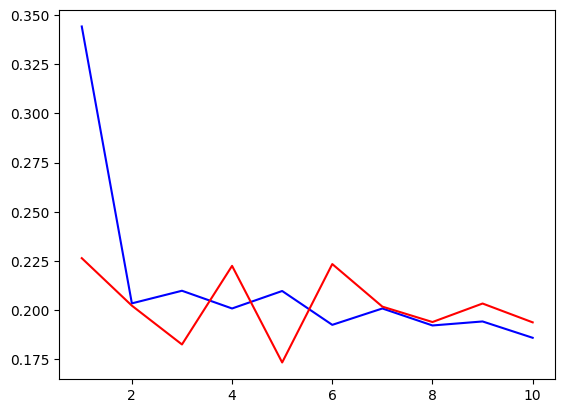

In [37]:
import matplotlib.pyplot as plt
epochs = range(1,11)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label = 'train acc')
plt.plot(epochs, val_acc, 'r', label = 'test acc')
plt.show()

### appropriate learning rate

In [38]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8330 - loss: 0.8980 - val_accuracy: 0.9544 - val_loss: 0.1573
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9624 - loss: 0.1282 - val_accuracy: 0.9637 - val_loss: 0.1396
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9753 - loss: 0.0911 - val_accuracy: 0.9679 - val_loss: 0.1362
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9782 - loss: 0.0802 - val_accuracy: 0.9716 - val_loss: 0.1470
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9841 - loss: 0.0601 - val_accuracy: 0.9693 - val_loss: 0.1832
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9859 - loss: 0.0578 - val_accuracy: 0.9712 - val_loss: 0.1824
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9881 - loss: 0.0454 - val_accuracy: 0.9697 - val_loss: 0.2078
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9903 - loss: 0.0381 - val_accuracy: 0.

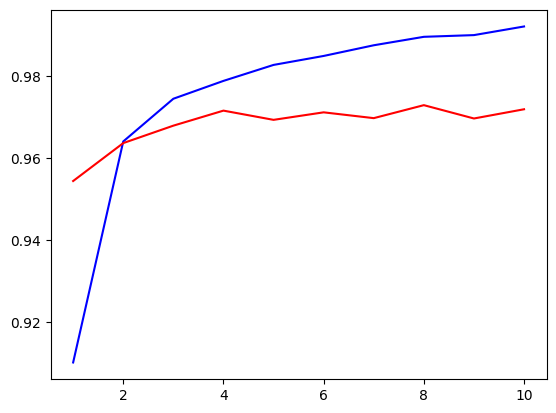

In [39]:
import matplotlib.pyplot as plt
epochs = range(1,11)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label = 'train acc')
plt.plot(epochs, val_acc, 'r', label = 'test acc')
plt.show()

## increase model capacity

### simple

In [40]:
model = keras.Sequential([
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
hist_small_model = model.fit(
    train_images,
    train_labels,
    epochs = 15,
    batch_size = 128,
    validation_split = 0.2
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7403 - loss: 1.0360 - val_accuracy: 0.9027 - val_loss: 0.3613
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9018 - loss: 0.3595 - val_accuracy: 0.9147 - val_loss: 0.3095
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9094 - loss: 0.3291 - val_accuracy: 0.9190 - val_loss: 0.2935
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9173 - loss: 0.2976 - val_accuracy: 0.9216 - val_loss: 0.2828
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9159 - loss: 0.3004 - val_accuracy: 0.9231 - val_loss: 0.2774
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9216 - loss: 0.2779 - val_accuracy: 0.9232 - val_loss: 0.2772
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9242 - loss: 0.2731 - val_accuracy: 0.9245 - val_loss: 0.2714
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9225 - loss: 0.2755 - val_accuracy: 0.

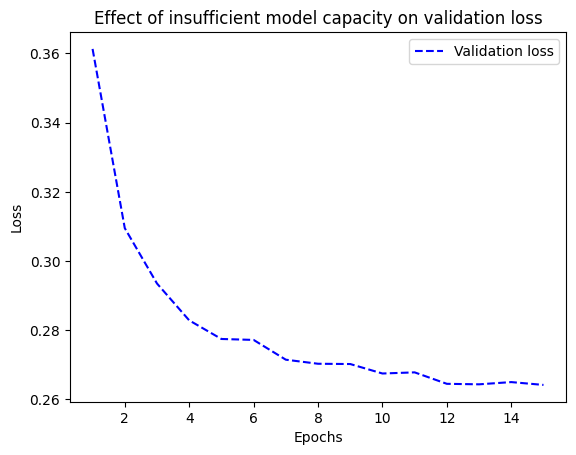

In [41]:
import matplotlib.pyplot as plt
val_loss = hist_small_model.history["val_loss"]
epochs = range(1, 16)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

### bigger

In [43]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=15,
    batch_size=128,
    validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8282 - loss: 0.6222 - val_accuracy: 0.9438 - val_loss: 0.1890
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9493 - loss: 0.1721 - val_accuracy: 0.9565 - val_loss: 0.1456
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9638 - loss: 0.1178 - val_accuracy: 0.9626 - val_loss: 0.1287
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9717 - loss: 0.0896 - val_accuracy: 0.9690 - val_loss: 0.1088
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9777 - loss: 0.0720 - val_accuracy: 0.9725 - val_loss: 0.0934
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9830 - loss: 0.0555 - val_accuracy: 0.9718 - val_loss: 0.0922
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0428 - val_accuracy: 0.9745 - val_loss: 0.0902
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9886 - loss: 0.0358 - val_accuracy: 0.

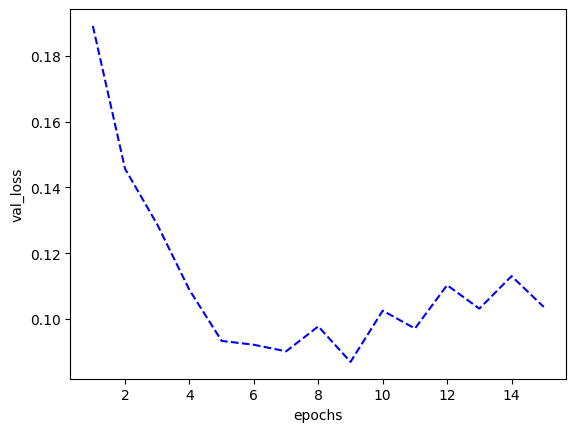

In [44]:
epochs = range(1,16)
plt.plot(epochs, history_large_model.history['val_loss'], 'b--')
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.show()

## network size

In [45]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### original model

In [46]:
model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

hisory_original = model.fit(
    train_data,
    train_labels,
    epochs = 20,
    batch_size = 512,
    validation_split = 0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.6790 - loss: 0.6243 - val_accuracy: 0.8610 - val_loss: 0.4006
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8961 - loss: 0.3246 - val_accuracy: 0.8879 - val_loss: 0.2947
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9334 - loss: 0.2057 - val_accuracy: 0.8879 - val_loss: 0.2788
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9539 - loss: 0.1537 - val_accuracy: 0.8907 - val_loss: 0.2828
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9693 - loss: 0.1141 - val_accuracy: 0.8851 - val_loss: 0.3001
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9787 - loss: 0.0847 - val_accuracy: 0.8818 - val_loss: 0.3268
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9869 - loss: 0.0641 - val_accuracy: 0.8789 - val_loss: 0.3586
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9906 - loss: 0.0511 - val_accuracy: 0.8765 - v

### lower capacity model

In [47]:
model = keras.Sequential([
    layers.Dense(4, activation = 'relu'),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer= 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history_small = model.fit(
    train_data,
    train_labels,
    epochs = 20,
    batch_size = 512,
    validation_split = 0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.5664 - loss: 0.6814 - val_accuracy: 0.6629 - val_loss: 0.6244
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7171 - loss: 0.6053 - val_accuracy: 0.7534 - val_loss: 0.5721
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7828 - loss: 0.5491 - val_accuracy: 0.7971 - val_loss: 0.5312
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8357 - loss: 0.5001 - val_accuracy: 0.8269 - val_loss: 0.4991
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8722 - loss: 0.4635 - val_accuracy: 0.8309 - val_loss: 0.4781
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8946 - loss: 0.4347 - val_accuracy: 0.8521 - val_loss: 0.4605
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9162 - loss: 0.4098 - val_accuracy: 0.8562 - val_loss: 0.4491
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9310 - loss: 0.3866 - val_accuracy: 0.8547 - 

### higher capacity model

In [50]:
model = keras.Sequential([
    layers.Dense(512, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history_higher = model.fit(
    train_data,
    train_labels,
    epochs = 20,
    batch_size = 512,
    validation_split = 0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.7476 - loss: 0.4922 - val_accuracy: 0.8848 - val_loss: 0.2833
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9521 - loss: 0.1417 - val_accuracy: 0.8836 - val_loss: 0.3226
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9879 - loss: 0.0489 - val_accuracy: 0.8766 - val_loss: 0.4235
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9983 - loss: 0.0126 - val_accuracy: 0.8717 - val_loss: 0.5631
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9999 - loss: 0.0025 - val_accuracy: 0.8773 - val_loss: 0.6363
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 1.0000 - loss: 6.7141e-04 - val_accuracy: 0.8767 - val_loss: 0.6815
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 2.9346e-04 - val_accuracy: 0.8769 - val_loss: 0.7109
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 2.0402e-04 - val_accurac

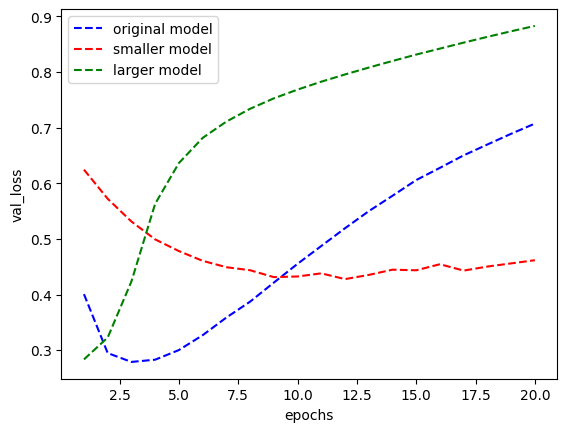

In [53]:
epochs = range(1,21)
plt.plot(epochs, hisory_original.history['val_loss'], 'b--', label='original model')
plt.plot(epochs, history_small.history['val_loss'], 'r--', label='smaller model')
plt.plot(epochs, history_higher.history['val_loss'], 'g--', label='larger model')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.show()

## Adding Dropout

In [56]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history_dropout = model.fit(
    train_data, train_labels,
    epochs = 20, batch_size = 512, validation_split = 0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - accuracy: 0.5907 - loss: 0.6630 - val_accuracy: 0.8569 - val_loss: 0.4085
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8577 - loss: 0.3735 - val_accuracy: 0.8874 - val_loss: 0.2839
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9319 - loss: 0.2041 - val_accuracy: 0.8892 - val_loss: 0.2836
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9545 - loss: 0.1330 - val_accuracy: 0.8839 - val_loss: 0.3280
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9722 - loss: 0.0905 - val_accuracy: 0.8822 - val_loss: 0.3726
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9850 - loss: 0.0512 - val_accuracy: 0.8790 - val_loss: 0.4192
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9923 - loss: 0.0316 - val_accuracy: 0.8772 - val_loss: 0.5552
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9932 - loss: 0.0243 - val_accuracy: 0.8769 - 

In [58]:
model2 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    #layers.Dropout(0.3),
    layers.Dense(64, activation = 'relu'),
    #layers.Dropout(0.5),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model2.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history_nodrop = model2.fit(
    train_data, train_labels,
    epochs = 20, batch_size = 512, validation_split = 0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.7076 - loss: 0.5838 - val_accuracy: 0.8827 - val_loss: 0.2861
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9282 - loss: 0.1988 - val_accuracy: 0.8806 - val_loss: 0.3177
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9660 - loss: 0.1080 - val_accuracy: 0.8731 - val_loss: 0.3810
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9806 - loss: 0.0713 - val_accuracy: 0.8737 - val_loss: 0.4256
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9918 - loss: 0.0388 - val_accuracy: 0.8717 - val_loss: 0.4783
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9976 - loss: 0.0174 - val_accuracy: 0.8703 - val_loss: 0.5541
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9992 - loss: 0.0086 - val_accuracy: 0.8691 - val_loss: 0.6165
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9992 - loss: 0.0061 - val_accuracy: 0.8685 - 

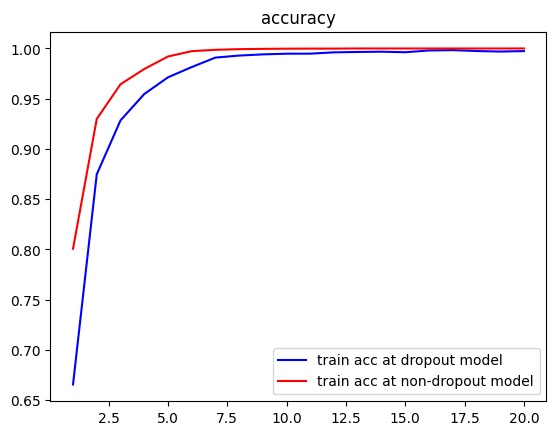

In [60]:
epc = range(1,21)
train_acc1 = history_dropout.history['accuracy']
train_acc2 = history_nodrop.history['accuracy']
plt.plot(epc, train_acc1, 'b', label = 'train acc at dropout model')
plt.plot(epc, train_acc2, 'r', label = 'train acc at non-dropout model')
plt.title('accuracy')
plt.legend()
plt.show()

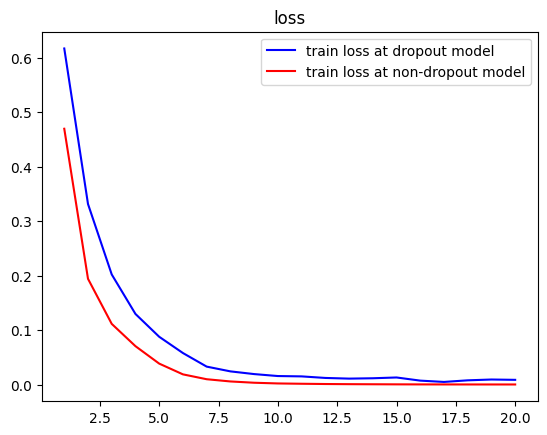

In [63]:
epc = range(1,21)
train_acc1 = history_dropout.history['loss']
train_acc2 = history_nodrop.history['loss']
plt.plot(epc, train_acc1, 'b', label = 'train loss at dropout model')
plt.plot(epc, train_acc2, 'r', label = 'train loss at non-dropout model')
plt.title('loss')
plt.legend()
plt.show()

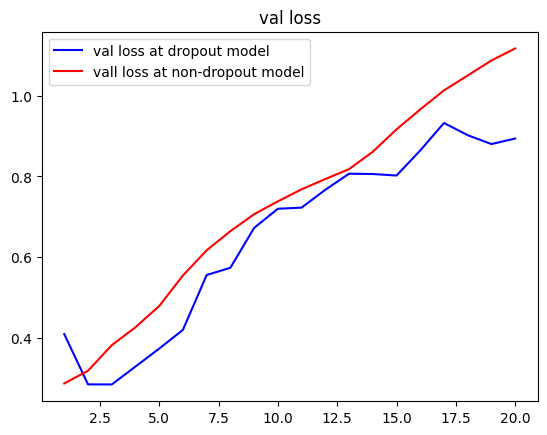

In [64]:
val_acc1 = history_dropout.history['val_loss']
val_acc2 = history_nodrop.history['val_loss']
plt.plot(epc, val_acc1, 'b', label = 'val loss at dropout model')
plt.plot(epc, val_acc2, 'r', label = 'vall loss at non-dropout model')
plt.title('val loss')
plt.legend()
plt.show()